# Descripcion del dataset - SkillCraft 
### "Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning", (Tomphson et al., 2013).

El aprendisaje y desarrollo de habilidades que diferencian a una persona novata de un experto es un proceso complejo. Algunas habilidades pueden ser entrenadas en cortos periodos tiempo (tareas simples), mientras que otras requieren un alto esfuerzo motor y cognitivo para ser llevadas a cabo. Dependiendo de los distintos niveles en los que uno podria clasificar a la persona en funcion de su habilidad para una tarea (novato, intermedio, avanzado, profecional, etc), ciertas variables involucradas en la realizacion de la tarea tendran mayor o menor relevancia para la transicion entre las diferentes etapas de aprendisaje. StarcraftII es un juego de estrategia altamente complejo, con diferentes aspectos a tener en cuenta para ganarle al adversario. Este dataset posee el analisis de 2500 jugadores de Starcraft, clasificados en diferentes categorias (ligas) en las que juegan normalente. Del analisis de este dataset se podrian responder ciertas preguntas especificas al proceso de aprendisaje:

* En el proceso de aprendisaje de una tarea, todas las habilidades involucradas mejoran a la misma tasa?

* Todas las habilidades tienen el mismo peso en el proceso de aprendisaje o existen algunas que permiten grandes saltos?

y otras referidas al juego en si:

* Que caracteristicas poseen los diferentes jugadores de Starcraft de las distintas ligas?

* Se puede predicir la liga de un jugador en funcion de la telemetria de sus partidas?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("SkillCraft1_Dataset.csv",encoding = "latin")
df.head(2500)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6976,4,22,4,730,113.9184,0.002900,0.000214,8,0.000051,0.000368,0.003515,28.3415,69.8102,5.1971,28,0.000624,7,0.000000,0.000000
2496,6978,2,19,8,100,54.0606,0.000028,0.000028,1,0.000000,0.000057,0.002933,93.6078,83.0680,3.1553,14,0.000541,5,0.000000,0.000000
2497,6979,6,22,28,1400,113.8680,0.003547,0.000147,3,0.000000,0.000294,0.002520,40.8235,55.1456,7.4563,8,0.001150,3,0.000000,0.000122
2498,6980,6,20,6,125,275.7342,0.013411,0.000831,6,0.000199,0.000684,0.006892,12.3723,28.8191,5.7990,30,0.001160,8,0.000234,0.001030


In [ ]:
df=df.drop('GameID', axis=1)
df = df.replace('?', np.nan)
df[["Age","HoursPerWeek","TotalHours"]] = df[["Age","HoursPerWeek","TotalHours"]].apply(pd.to_numeric)
print(df.columns)


## Analizo la relacion entre variables

<AxesSubplot:>

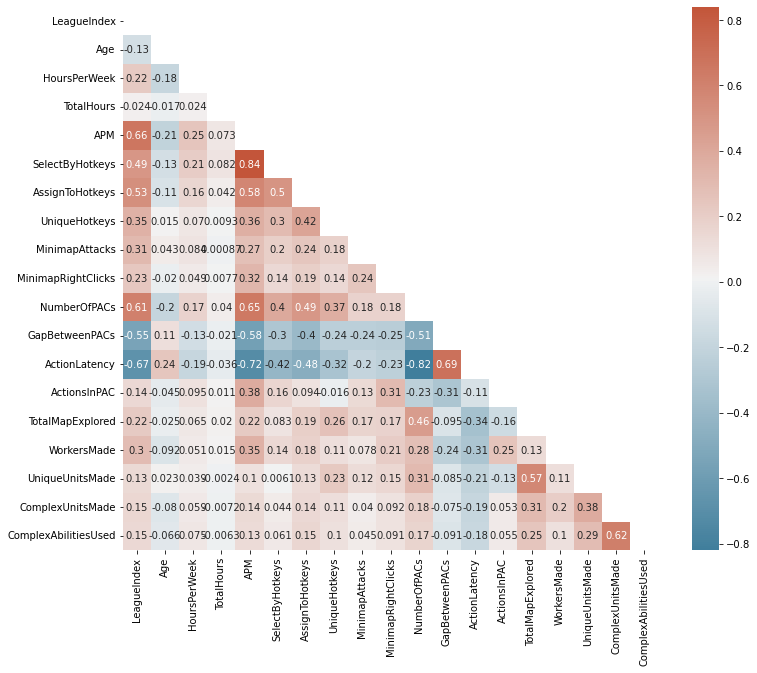

In [34]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Llamativamente, ni la edad del jugador ni el tiempo total jugado parecen correlacionarse positivamente con la liga del jugador ni con las otras variables evaluadas. Sin embargo, el tiempo jugado por semana parece correlacionarse positivamente (0.21) con la liga del jugador 

### La edad es bastante homogenea entre las disitintas ligas

In [25]:
df[["LeagueIndex","Age"]].groupby(["LeagueIndex"]).describe()


Age                                                   
             count       mean       std   min   25%   50%   75%   max
LeagueIndex                                                          
1            167.0  22.724551  5.522860  16.0  19.0  21.0  26.0  40.0
2            347.0  22.155620  5.091531  16.0  18.0  21.0  25.0  43.0
3            553.0  22.050633  4.901305  16.0  18.0  21.0  24.0  41.0
4            811.0  21.981504  4.141736  16.0  19.0  21.0  24.0  44.0
5            806.0  21.362283  3.662164  16.0  18.0  21.0  24.0  37.0
6            621.0  20.677939  3.030381  16.0  18.0  20.0  22.0  31.0
7             35.0  21.171429  2.864444  16.0  19.0  22.0  23.0  26.0
8              0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN

### A partir de la liga 4 se observan algunos aumentos en el numero de horas, sin embargo no hay grandes diferencias

In [24]:

df[["LeagueIndex","HoursPerWeek"]].groupby(["LeagueIndex"]).describe()


HoursPerWeek                                                    
                   count       mean        std  min   25%   50%   75%    max
LeagueIndex                                                                 
1                  167.0  13.125749   9.405317  2.0   8.0  12.0  16.0   70.0
2                  347.0  13.296830   9.594740  2.0   8.0  10.0  18.0   72.0
3                  553.0  13.949367   9.744432  2.0   8.0  12.0  20.0   80.0
4                  811.0  14.022195  10.205518  2.0   8.0  12.0  20.0   96.0
5                  805.0  16.183851  11.370556  2.0   8.0  12.0  20.0   96.0
6                  621.0  21.088567  15.125290  0.0  10.0  20.0  28.0  168.0
7                   35.0  31.714286  20.626327  6.0  15.0  28.0  42.0   98.0
8                    0.0        NaN        NaN  NaN   NaN   NaN   NaN    NaN

In [21]:
df[["LeagueIndex","TotalHours"]].groupby(["LeagueIndex"]).describe()

TotalHours                                                   \
                 count         mean           std    min    25%     50%   
LeagueIndex                                                               
1                167.0   264.191617    265.060164   12.0   71.0   200.0   
2                347.0   331.409222    289.403722   10.0  110.0   250.0   
3                553.0   493.792043    624.206083    3.0  200.0   400.0   
4                811.0   588.006165    741.306772    7.0  300.0   500.0   
5                804.0  2024.493781  35251.787171   25.0  400.0   700.0   
6                621.0   988.405797   1119.938623   50.0  600.0   800.0   
7                 35.0  1581.028571   1652.020679  240.0  715.0  1250.0   
8                  0.0          NaN           NaN    NaN    NaN     NaN   

                                
                75%        max  
LeagueIndex                     
1             400.0     1870.0  
2             500.0     2000.0  
3             600.0    10260.0  
4             730.0    18000.0  
5             900.0  1000000.0  
6            1200.0    25000.0  
7            2000.0    10000.0  
8               NaN        NaN

Esto sugiere que independientemente del numero de horas empleado,  el jugador debe entrenar ciertos aspectos especificos de su juego para subir o ser considerado de una categoria mayor.

### Descrbiendo otras variables

APM: Acciones por minuto //
ActionLatency: Mide el tiempo de reaccion ante un estimulo nuevo

<AxesSubplot:xlabel='ActionLatency', ylabel='APM'>

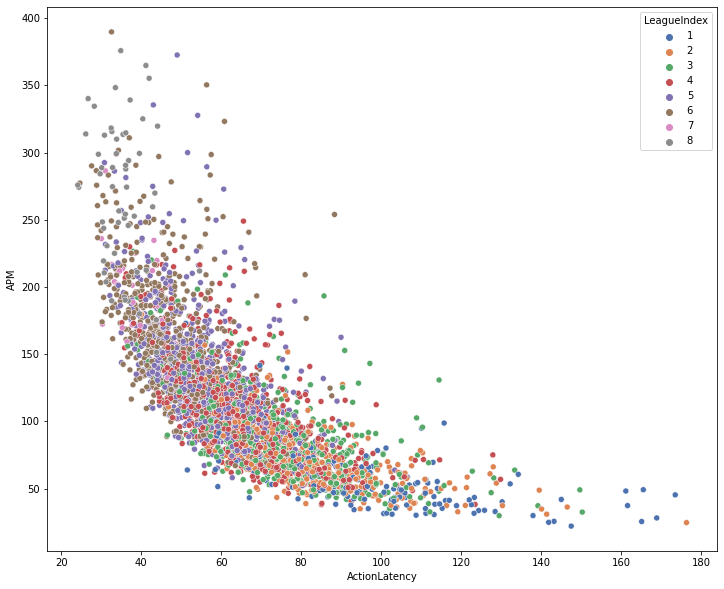

In [47]:
f, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="ActionLatency", y="APM", hue="LeagueIndex", palette="deep")


Las categorias bajas estan asociadas a tiempos de latencia altos y numeros de acciones por minuto menores. Sin embargo, a partir de la 3 categoria, los jugadores presentan tiempos de respuestas a estimulos similares, sugiriendo que hay otros aspectos a tener en cuenta para la clasificacion y generacion de un futuro modelo predictivo. 